In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [57]:
dataset, dataset_info = tfds.load("malaria", with_info=True, as_supervised=True, shuffle_files=True, split=["train"])
dataset = dataset[0]
data_size = dataset_info.splits["train"].num_examples

In [ ]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

In [59]:
def split(dataset, train_ratio, val_ratio, test_ratio, data_size):
    train_size = int(train_ratio * data_size)
    val_size = int(val_ratio * data_size)
    test_size = int(test_ratio * data_size)

    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size).take(test_size)
    return train_dataset, val_dataset, test_dataset

In [62]:
train_dataset, val_dataset, test_dataset = split(dataset, train_ratio, val_ratio, test_ratio, data_size)


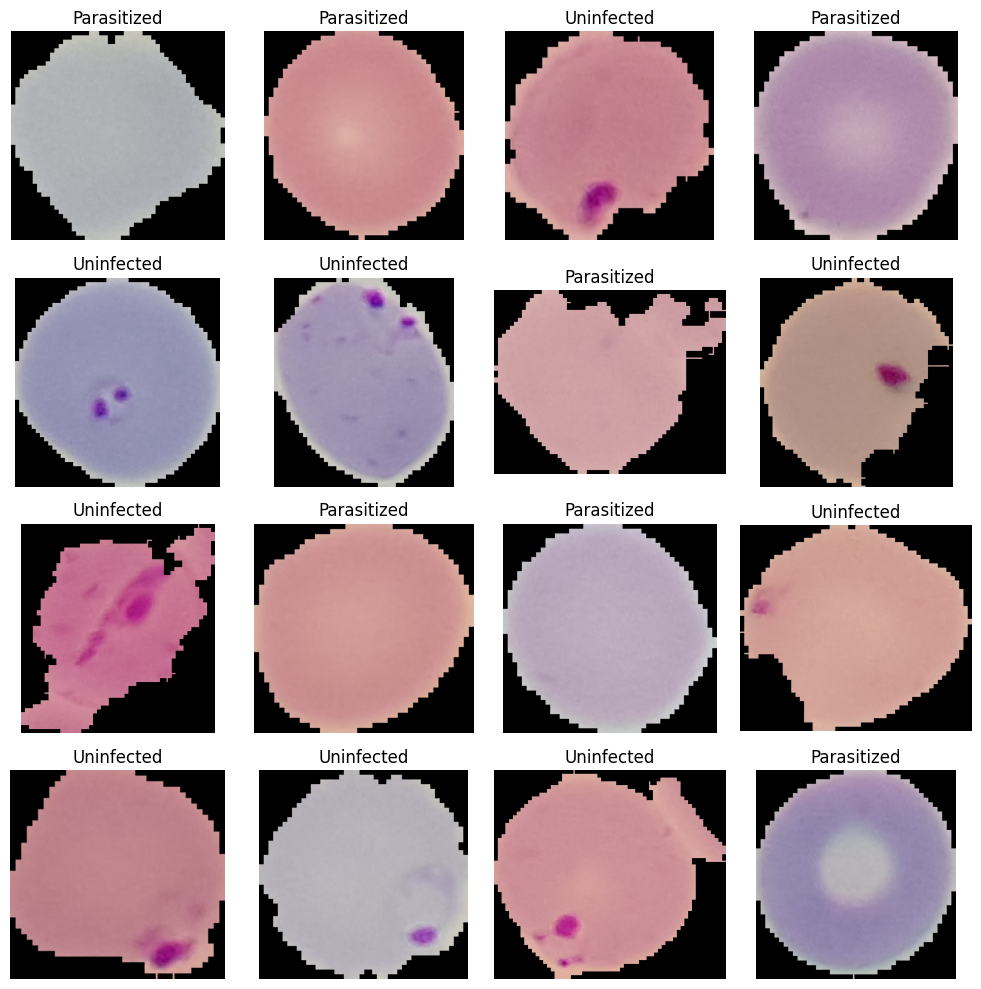

In [65]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(16)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    plt.title("Parasitized" if label == 1 else "Uninfected")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [70]:
#resize all image into 224 * 224 
#Normalize
IM_SIZE = 244
def resize_rescale(image,label):
    image = tf.image.resize(image, (IM_SIZE, IM_SIZE))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1] or resclat
    return image, label


In [71]:
train_dataset =train_dataset.map(resize_rescale)

In [72]:
for image,label in train_dataset.take(1):
    print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(244, 244, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
#each image has 244*244*3 = 150528 Values. 
#Thus  we use convlution AKA CNN